## Observations and Insights 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
print(type(mouse_metadata))

<class 'pandas.core.frame.DataFrame'>


In [42]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()
print(mouse_count)
print(len(merge_df["Mouse ID"].unique()))

1893
249


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merge_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_data


##Come back to this

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [32]:
merge_with_dup_df = merge_df
merge_with_dup_df["Is duplicate?"] = duplicated_data
merge_with_dup_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [33]:
merge_with_dup_df.loc[merge_with_dup_df["Is duplicate?"] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 


##Come back to this

In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [36]:
clean_df["Tumor Volume (mm3)"].min()

22.05012627

In [41]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = clean_df["Mouse ID"].count()
print(cleaned_mouse_count)
print(len(clean_df["Mouse ID"].unique()))

1888
249


In [9]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group_df = clean_df.groupby("Drug Regimen") 
regimen_summary_df = regimen_group_df["Tumor Volume (mm3)"].describe()
regimen_summary_df["median"] = regimen_group_df["Tumor Volume (mm3)"].median()
regimen_summary_df["SEM"] = regimen_group_df["Tumor Volume (mm3)"].sem()
regimen_summary_df


## Do not think this is correct

,count,mean,std,min,25%,50%,75%,max,median,SEM
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,41.557809,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,51.776157,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,51.820584,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,53.698743,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,52.509285,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,52.288934,0.581331
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421,50.909965,0.525862
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,40.673236,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,52.431737,0.573111


In [57]:
reg_sum_df2 = pd.DataFrame()
reg_sum_df2["Mean"] = regimen_group_df["Tumor Volume (mm3)"].mean()
reg_sum_df2["Median"] = regimen_group_df["Tumor Volume (mm3)"].median()
reg_sum_df2["Variance"] = regimen_group_df["Tumor Volume (mm3)"].var()
reg_sum_df2["Std"] = regimen_group_df["Tumor Volume (mm3)"].std()
reg_sum_df2["SEM"] = regimen_group_df["Tumor Volume (mm3)"].sem()
reg_sum_df2

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
regimen_group_df["Tumor Volume (mm3)"].max()

Drug Regimen
Capomulin    48.158209
Ceftamin     68.923185
Infubinol    72.226731
Ketapril     78.567014
Naftisol     76.668817
Placebo      73.212939
Propriva     72.455421
Ramicane     47.622816
Stelasyn     75.123690
Zoniferol    73.324432
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_sum = regimen_group_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen_summary_df["count"]
regimen_count


Drug Regimen
Capomulin    230.0
Ceftamin     178.0
Infubinol    178.0
Ketapril     188.0
Naftisol     186.0
Placebo      181.0
Propriva     156.0
Ramicane     228.0
Stelasyn     181.0
Zoniferol    182.0
Name: count, dtype: float64

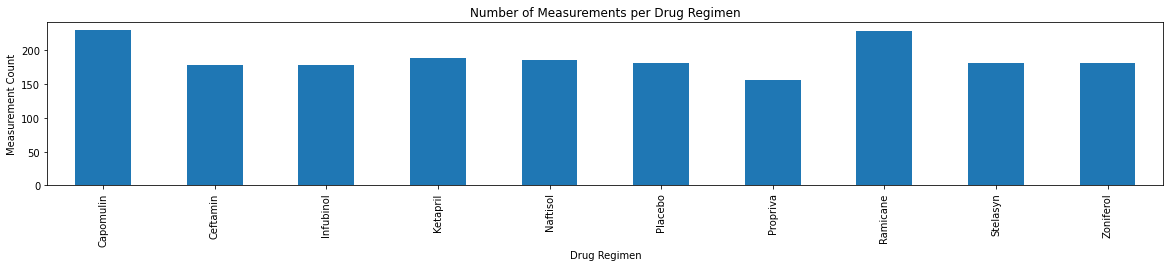

<Figure size 432x288 with 0 Axes>

In [34]:
regimen_count.plot(kind="bar", figsize=(20,3))
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Measurement Count")
plt.show()
plt.tight_layout()

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin", "Infubinol",  "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn",
         "Zoniferol"]
drug_count = [230.0, 178.0, 178.0, 188.0, 186.0, 181.0, 156.0, 228.0, 181.0, 182.0]


Text(23.875, 0.5, 'Measurement Count')

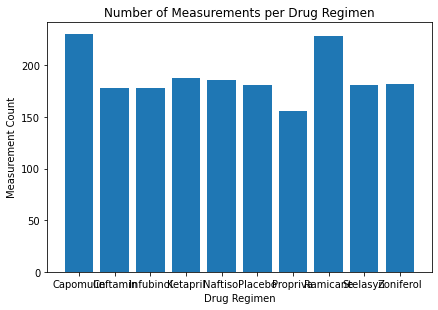

In [33]:
plt.bar(drugs, drug_count, align="center")
plt.tight_layout()

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

##Need to space this out better

In [45]:
df_of_gender = clean_df[["Mouse ID", "Sex"]]
count_of_gender = df_of_gender.drop_duplicates(subset="Mouse ID")
count_of_gender["Sex"].value_counts()

Male      125
Female    124
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Males vs Females')

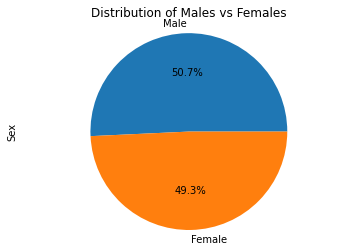

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Males vs Females")

##Need to change this and use the actual gender count based on removing the duplicates via the cell above

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_number = [958, 930]
explode = (0,0)


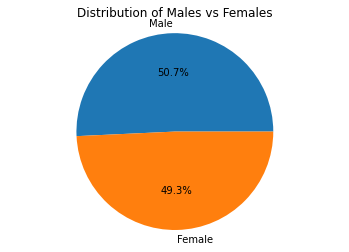

In [46]:
plt.pie(gender_number, explode=explode, labels=gender,
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Males vs Females")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
